In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


sns.set_theme(style="darkgrid")
sns.set_context("paper")


In [2]:
class BTS:
    def __init__(self, x, y, bandwidth):
        # Initialize the class with x, y and bandwidth
        self.x = x
        self.y = y
        self.bandwidth = bandwidth

    def __repr__(self):
        # Return a string representation of the object
        return f'BTS({self.x}, {self.y}, {self.bandwidth})'

    def __eq__(self, other):
        # Check if two BTS objects are equal
        return self.x == other.x and self.y == other.y

    def __hash__(self):
        # Hash the BTS object
        return hash((self.x, self.y, self.bandwidth))


In [3]:
class Neighbor:
    def __init__(self, x, y, population):
        # Initialize the class with x, y and population
        self.x = x
        self.y = y
        self.population = population

    def __eq__(self, other):
        # Check if two neighbors are equal
        return (self.x == other.x) and (self.y == other.y)

    def __hash__(self):
        # Hash the neighbor object
        return hash((self.x, self.y, self.population))

    def __repr__(self):
        # Return a string representation of the object
        return f'Neighbor({self.x}, {self.y}, {self.population})'


In [4]:
LOG_FILE = 'log_0.9_0.9.txt'
SEP = '--------------------------------------------'

with open(LOG_FILE, 'r') as inp:
    data = '\n'.join(inp.readlines()).split(SEP)


In [5]:
list_of_bts = eval(data[-1].strip())
x_bts = [i.x for i in list_of_bts]
y_bts = [i.y for i in list_of_bts]
list_of_bts


[BTS(5.268821336412266, 6.83842338862222, 558115.1811906168),
 BTS(16.98055149571568, 13.85747787358497, 621437.4044355833),
 BTS(12.3114868868938, 2.053458840066062, 586483.9199458034),
 BTS(5.179163469471982, 18.96072783324537, 868200.72006652)]

In [6]:
assigned_neighbors = eval(data[1].strip())
x_neighbors = [i.x for i in assigned_neighbors]
y_neighbors = [i.y for i in assigned_neighbors]


In [7]:
bts_frame = pd.DataFrame({"x": x_bts, "y": y_bts})
neighbor_frame = pd.DataFrame({"x": x_neighbors, "y": y_neighbors})


In [8]:
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(x_bts))]
neighbors_colors = []

for n, b in assigned_neighbors.items():
    neighbors_colors.append(colors[list_of_bts.index(b)])


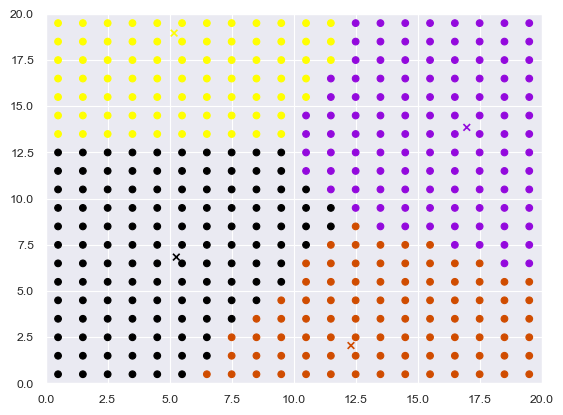

In [9]:
plt.scatter(x_bts, y_bts, color=colors, marker='x')
plt.scatter(x_neighbors, y_neighbors, color=neighbors_colors)

plt.xlim([0, 20])
plt.ylim([0, 20])

plt.grid(True)
plt.show()
